# WEEK 4 PROJECT: Text classification

In [169]:
import requests
from bs4 import BeautifulSoup
import re
from random import sample
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

WEB SCRAPING

In [96]:
def import_artist(my_artist):
    """ function that retrive the list of the songs of an Artist
    my_artist= artist name (if a space is necessary use _)
    returns: lyric_codes
    """
    
    url_artist = f'https://www.lyrics.com/artist/{my_artist}'
    response = requests.get(url_artist)
    if response.status_code != 200:
        print ('Status code not 200. Check it out! They might have banned you!')
    else:   #retrieve the list of songs from lyrics.com
        my_artist_html = response.text
        
         #get lyrics code
    pattern=re.compile('/lyric/+\d{2,15}')
    codes=re.findall(pattern,my_artist_html)
    lyric_codes=codes
    #for code in codes: # some codes are double and this remove the double codes
        #if code not in lyric_codes:
        #lyric_codes.append([code])
    #lyric_codes=lyric_codes+codes
    return lyric_codes


In [3]:
def save_songs(lyric_codes, n):
    """This function save txt file of the html songs
    inputs: lyric_coded form the function import_artist
    n: number of random songs to save
    return: random_lyric_codes (codes of the songs randomly choosen)
    and save the html file on the working directory
    """
    
    #and choose N random songs from the list
    random_lyric_codes=random.sample(lyric_codes,n)
    
    for i in range(len(random_lyric_codes)):
        url_song = f'https://www.lyrics.com/{random_lyric_codes[i]}'
        response = requests.get(url_song)
        if response.status_code != 200:
            print ('Status code not 200. Check it out! They might have banned you!')
        else:
            my_song_html = response.text
            song_number=re.findall('\d+', url_song)
            with open (f"song{song_number}_html.txt", "w", encoding='utf-8') as f:
                f.write(my_song_html)
            print(f'https://www.lyrics.com/{random_lyric_codes[i]}')
    return random_lyric_codes

In [149]:
artist="Muse" #insert artist name  "The_Rolling_Stones", "The_Beatles"
lyric_codes=import_artist(artist)

In [150]:
globals()[f"random_lyric_codes_{artist}"]=save_songs(lyric_codes, 15) # add the number of song yu want to import

https://www.lyrics.com//lyric/9960867
https://www.lyrics.com//lyric/14007622
https://www.lyrics.com//lyric/5753084
https://www.lyrics.com//lyric/20085504
https://www.lyrics.com//lyric/24147875
https://www.lyrics.com//lyric/5753078
https://www.lyrics.com//lyric/19391980
https://www.lyrics.com//lyric/8961669
https://www.lyrics.com//lyric/11935457
https://www.lyrics.com//lyric/31424896
https://www.lyrics.com//lyric/14007620
https://www.lyrics.com//lyric/35595638
https://www.lyrics.com//lyric/24147884
https://www.lyrics.com//lyric/21013281
https://www.lyrics.com//lyric/31910220


In [151]:
# beautiful soup and creation of list and labels
random_lyric_codes=globals()[f'random_lyric_codes_{artist}']
globals()[f'song_list_{artist}']=[]
globals()[f'labels_{artist}']=[]
for song in random_lyric_codes:
    song_number=re.findall('\d+', song)
    with open (f'song{song_number}_html.txt', encoding='utf-8') as f: 
        print(f'song{song_number}')
        my_song_html= f.read()
        my_song_soup= BeautifulSoup(my_song_html, 'html.parser')
        if my_song_soup.pre != None:        
            lyrics=re.sub('[\\n]', ' ', my_song_soup.pre.text)
            globals()[f'song_list_{artist}'].append(lyrics)
            globals()[f'labels_{artist}'].append(artist)
        

song['9960867']
song['14007622']
song['5753084']
song['20085504']
song['24147875']
song['5753078']
song['19391980']
song['8961669']
song['11935457']
song['31424896']
song['14007620']
song['35595638']
song['24147884']
song['21013281']
song['31910220']


In [154]:
song_list=song_list_Muse+song_list_Coldplay
labels=labels_Muse+labels_Coldplay

In [155]:
song_list

["She had something to confess to But you don't have the time So look the other way You will wait until it's over To reveal what you'd never shown her Too little much too late  Too long trying to resist it You've just gone and missed it It's escaped your world  Can you see that I am needing And begging for so much more Than you could ever give And I don't want you to adore me Don't want you to ignore me When it pleases you Yeah, and I'll do it on my own  I have played in every toilet But you still want to spoil it To prove I've made a big mistake Too long trying to resist it You've just gone and missed it It's escaped your world  Can you see that I am needing And begging for so much more Than you could ever give And I don't want you to adore me Don't want you to ignore me When it pleases you Yeah, and I'll do it on my own And I'll do it all by myself You will never make it",
 "Follow through  Make our dreams come true  Don't give up the fight  You will be alright  Cause there's no one 

In [156]:
len(song_list), len(labels)

(30, 30)

Count Vectorizer

In [157]:
cv = CountVectorizer(stop_words='english')
cv.fit(song_list)
vec = cv.transform(song_list)
#cv.get_feature_names()

In [158]:
X_train, X_test, y_train, y_test = train_test_split(vec,labels)

Naive Bayes

In [159]:
tf = TfidfTransformer()
out = tf.fit_transform(X_train)

In [160]:
m = MultinomialNB()
m.fit(X_train, y_train)
m.score(X_train, y_train)

1.0

In [168]:
m.score(X_test, y_test)

0.625

In [161]:
m.predict(X_test)

array(['Muse', 'Coldplay', 'Muse', 'Muse', 'Coldplay', 'Muse', 'Muse',
       'Coldplay'], dtype='<U8')

In [162]:
y_test

['Muse',
 'Muse',
 'Coldplay',
 'Muse',
 'Coldplay',
 'Coldplay',
 'Muse',
 'Coldplay']

In [163]:
m.predict_proba(X_test).round(5)

array([[0.0000e+00, 1.0000e+00],
       [9.2382e-01, 7.6180e-02],
       [2.2120e-01, 7.7880e-01],
       [1.7000e-04, 9.9983e-01],
       [1.0000e+00, 0.0000e+00],
       [1.4000e-04, 9.9986e-01],
       [3.3513e-01, 6.6487e-01],
       [9.9998e-01, 2.0000e-05]])

EXTRA: could of words

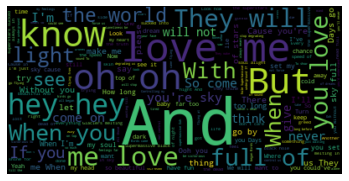

In [167]:
text=" ".join(song_list)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()